In [ ]:
# Book: Magnus Ekman - Learning Deep Learning 
### Chapter 6: FCNs Applied to Regression with Boston Housing Dataset

# Fully Connected Networks applied to Regression Problem

In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import logging

In [12]:
from keras.datasets import boston_housing
tf.get_logger().setLevel(logging.ERROR)

EPOCHS = 500
BATCH_SIZE = 16

# Read the data

# The data is not normalized for now
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()



In [13]:
import pandas as pd

In [14]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


As can be seen the features is not normalized, so we need to do it before attempting any training

In [15]:
x_mean = np.mean(X_train, axis = 0)
x_std = np.std(X_train, axis = 0)

In [16]:
x_mean.shape, x_std.shape

((13,), (13,))

In [17]:
x_train = (X_train - x_mean) / x_std
x_test = (X_test - x_mean) / x_std

In [18]:
model = Sequential()
model.add(Dense(64, activation = "relu", input_shape=[13]))
model.add(Dense(64, activation = "relu")) # We are doing DL
model.add(Dense(1, activation = 'linear'))

model.compile(loss='mean_squared_error', optimizer = "adam", metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = EPOCHS, batch_size=BATCH_SIZE, verbose = 2, shuffle = True)

Epoch 1/500
26/26 - 0s - loss: 221.1358 - mean_absolute_error: 12.6433 - val_loss: 122.5685 - val_mean_absolute_error: 8.1414 - 123ms/epoch - 5ms/step
Epoch 2/500
26/26 - 0s - loss: 44.2989 - mean_absolute_error: 4.9074 - val_loss: 41.0916 - val_mean_absolute_error: 4.7660 - 117ms/epoch - 4ms/step
Epoch 3/500
26/26 - 0s - loss: 23.5710 - mean_absolute_error: 3.4308 - val_loss: 28.4045 - val_mean_absolute_error: 4.0074 - 86ms/epoch - 3ms/step
Epoch 4/500
26/26 - 0s - loss: 18.8951 - mean_absolute_error: 3.0653 - val_loss: 25.4503 - val_mean_absolute_error: 3.7198 - 85ms/epoch - 3ms/step
Epoch 5/500
26/26 - 0s - loss: 15.8765 - mean_absolute_error: 2.8639 - val_loss: 25.3824 - val_mean_absolute_error: 3.5701 - 82ms/epoch - 3ms/step
Epoch 6/500
26/26 - 0s - loss: 14.2246 - mean_absolute_error: 2.6830 - val_loss: 24.4475 - val_mean_absolute_error: 3.4782 - 91ms/epoch - 4ms/step
Epoch 7/500
26/26 - 0s - loss: 13.6710 - mean_absolute_error: 2.6808 - val_loss: 23.4088 - val_mean_absolute_erro

In [26]:
preds = model.predict(x_test)

for i in range(4):
    print(f"Prediction: {preds[i].item()}, True Val: {y_test[i]} ")

4/4 [==============================] - 0s 2ms/step
Prediction: 10.36799430847168, True Val: 7.2 
Prediction: 19.287109375, True Val: 18.8 
Prediction: 20.083467483520508, True Val: 19.0 
Prediction: 31.314022064208984, True Val: 27.0 


dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


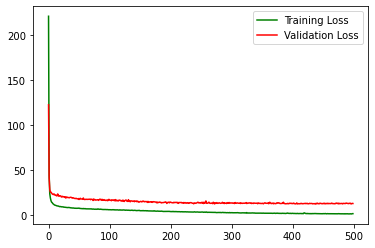

In [31]:
import matplotlib.pyplot as plt

print(dict.keys(history.history))

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(range(EPOCHS), loss, 'g', label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, 'r', label = 'Validation Loss')
plt.legend()
plt.show()
# loss = history.history["mae"]
# val_loss = history.history["val_mae"]
# epochs = range(1, len(loss)+1)
# plt.figure()
# plt.plot(epochs, loss, "bo", label="Training MAE")
# plt.plot(epochs, val_loss, "b", label="Validation MAE")
# plt.title("Train and Val MAE")
# plt.legend()
# plt.show()

<Figure size 432x288 with 0 Axes>

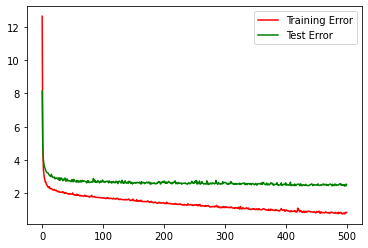

In [34]:
plt.figure()
loss = history.history['mean_absolute_error']
val_loss = history.history['val_mean_absolute_error']

plt.figure()
plt.plot(range(EPOCHS), loss, 'r', label = 'Training Error')
plt.plot(range(EPOCHS), val_loss, 'g', label = 'Test Error')
plt.legend()
plt.show()